In [ ]:
import cv2 as cv
import numpy as np
import tensorflow
import tflearn
import os
import matplotlib.pyplot as plt

In [ ]:
adr='C:/Users/Aditya/Desktop/ExpH_Pune/Folder/datasets/VEHICLES/'

## Airplanes

In [ ]:
airlist=os.listdir(adr+'airplane')

In [ ]:
airlabel=np.zeros((len(airlist),1))
airlabel.shape

In [ ]:
airfeatures=[]
for a in airlist:
    pln=cv.imread(adr+'airplane/'+a)
    pln=cv.resize(pln,(100,100))
    airfeatures.append(pln)

In [7]:
airfeatures=np.array(airfeatures)
airfeatures.shape

(727, 100, 100, 3)

## Car

In [8]:
carlist=os.listdir(adr+'Car')

In [9]:
carlabel=np.ones((len(carlist),1))
carlabel.shape

(830, 1)

In [10]:
carfeature=[]
for i in carlist:
    cr=cv.imread(adr+'car/'+i)
    cr=cv.resize(cr,(100,100))
    carfeature.append(cr)

In [11]:
carfeature=np.array(carfeature)
carfeature.shape

(830, 100, 100, 3)

## Bike

In [12]:
bklist=os.listdir(adr+'Bikes')

In [13]:
bklabel=np.ones((len(bklist),1))*2
bklabel.shape

(788, 1)

In [14]:
bkfeatures=[]
for i in bklist:
    bik=cv.imread(adr+'Bikes/'+i)
    bik=cv.resize(bik,(100,100))
    bkfeatures.append(bik)

In [15]:
bkfeatures=np.array(bkfeatures)
bkfeatures.shape

(788, 100, 100, 3)

## Data Combination

In [16]:
Labels=np.concatenate((airlabel,carlabel,bklabel))
Labels.shape

(2345, 1)

In [17]:
Output_Y=[]
for i in Labels:
    if int(i)==0:
        Output_Y.append([1,0,0])
    elif int(i)==1:
        Output_Y.append([0,1,0])
    elif int(i)==2:
        Output_Y.append([0,0,1])
    else:
        print(i)

In [18]:
Output_Y=np.array(Output_Y)
Output_Y=Output_Y.reshape(-1,3)
Output_Y.shape

(2345, 3)

In [19]:
Features=np.concatenate((airfeatures,carfeature,bkfeatures))
Features.shape

(2345, 100, 100, 3)

In [20]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Features,Output_Y)

In [21]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)
ytest

(1758, 100, 100, 3)
(587, 100, 100, 3)
(1758, 3)
(587, 3)


array([[0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0]])

In [22]:
from tflearn.layers.conv import conv_2d,max_pool_2d
from tflearn.layers.core import input_data,fully_connected,dropout
from tflearn.layers.estimator import regression

In [23]:
#Input Layer
cnet=input_data(shape=[None,100,100,3],name='input')

#1st Conv. Layer
cnet=conv_2d(cnet,93,8,activation='relu')
#Max-Pool
cnet=max_pool_2d(cnet,5)

#2nd Conv. Layer
cnet=conv_2d(cnet,86,8,activation='relu')
#Max-Pool
cnet=max_pool_2d(cnet,8)

#3rd Conv. Layer
cnet=conv_2d(cnet,79,8,activation='relu')
#Max-Pool
cnet=max_pool_2d(cnet,8)

#4th Conv. Layer
cnet=conv_2d(cnet,72,8,activation='relu')
#Max-Pool
cnet=max_pool_2d(cnet,8)

#Fully Connected
cnet=fully_connected(cnet,(65*65),activation='relu')

#dropout
cnet=dropout(cnet,0.6)

#Output
cnet=fully_connected(cnet,3,activation='softmax')


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [24]:
cnet=regression(cnet,optimizer='adam',loss='categorical_crossentropy',name='output',learning_rate=0.0003)


Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [25]:
cnnmodel=tflearn.DNN(cnet)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



In [26]:
cnnmodel.fit({'input':xtrain},{'output':ytrain},n_epoch=5,validation_set=({'input':xtest},{'output':ytest}),show_metric=True)

Training Step: 139  | total loss: 0.06285 | time: 61.170s
| Adam | epoch: 005 | loss: 0.06285 - acc: 0.9906 -- iter: 1728/1758
Training Step: 140  | total loss: 0.05802 | time: 69.183s
| Adam | epoch: 005 | loss: 0.05802 - acc: 0.9900 | val_loss: 0.07541 - val_acc: 0.9847 -- iter: 1758/1758
--


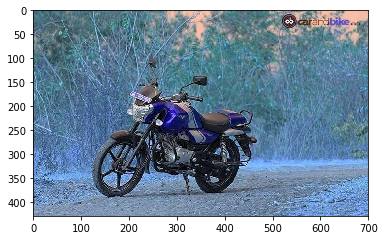

Airplane


In [45]:
p_addr='C:/Users/Aditya/Desktop/ExpH_Pune/Folder/ImagePred/'
p_list=os.listdir(p_addr)
predimage=cv.imread(p_addr+'bike4.jpg')

plt.imshow(predimage)
plt.show()
predimage=cv.resize(predimage,(100,100))
predimage=predimage.reshape((1,100,100,3))
predict_int=np.argmax(cnnmodel.predict(predimage))

if predict_int==0:
    pred='Airplane'
elif predict_int==1:
    pred='Car'
elif predict_int==2:
    pred='Bike'
    
print(pred)